# **Notebook 7: Cluster Analysis**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues/jupyter_notebooks
New Current Directory: /workspace/milestone-project-housing-issues


## Load dataset

In [3]:
# Loading dataset HousePricesClean from /workspace/milestone-project-housing-issues/outputs/datasets/cleaned/HousePricesClean.csv

import pandas as pd
df_houseprices_cluster = pd.read_csv(f"/workspace/milestone-project-housing-issues/outputs/datasets/collection/HousePricesClean.csv").drop(['SalePrice'], axis=1)
print(df_houseprices_cluster.shape)
df_houseprices_cluster.head()

(1460, 20)


,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade
0,856,3,No,GLQ,RFn,2003,1710,Gd,8450,65,5,7,856,2003,1,1,1,1,1,0
1,1262,3,Gd,ALQ,RFn,1976,1262,TA,9600,80,8,6,1262,1976,0,0,0,1,1,0
2,920,3,Mn,GLQ,RFn,2001,1786,Gd,11250,68,5,7,920,2001,1,1,1,1,1,1
3,961,2,No,ALQ,Unf,1998,1717,Gd,9550,60,5,7,756,1915,0,0,1,1,1,1
4,1145,4,Av,GLQ,RFn,2000,2198,Gd,14260,84,5,8,1145,2000,0,1,1,1,1,0


In [4]:
df_houseprices_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1460 non-null   int64 
 1   BedroomAbvGr  1460 non-null   int64 
 2   BsmtExposure  1460 non-null   object
 3   BsmtFinType1  1460 non-null   object
 4   GarageFinish  1460 non-null   object
 5   GarageYrBlt   1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   KitchenQual   1460 non-null   object
 8   LotArea       1460 non-null   int64 
 9   LotFrontage   1460 non-null   int64 
 10  OverallCond   1460 non-null   int64 
 11  OverallQual   1460 non-null   int64 
 12  TotalBsmtSF   1460 non-null   int64 
 13  YearBuilt     1460 non-null   int64 
 14  Has2ndFloor   1460 non-null   int64 
 15  HasMasVnr     1460 non-null   int64 
 16  HasOpenPorch  1460 non-null   int64 
 17  HasGarage     1460 non-null   int64 
 18  HasFinBsmt    1460 non-null   int64 
 19  ModsMa

# Cluster Pipeline with all data

Section 1 content

In [5]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection

# Feat Scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# ML algorithm
from sklearn.cluster import KMeans


def PipelineCluster():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.6, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=50, random_state=0)),

        ("model", KMeans(n_clusters=50, random_state=0)),


    ])
    return pipeline_base

In [6]:
# Full list of variables: ['1stFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'SalePrice', 'Has2ndFloor', 'HasMasVnr', 'HasOpenPorch', 'HasGarage', 'HasFinBsmt', 'ModsMade']

## Principal Component Analysis

In [7]:
pipeline_cluster = PipelineCluster()
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df_houseprices_cluster)

print(df_pca.shape,'\n', type(df_pca))

(1460, 17) 
 <class 'numpy.ndarray'>


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


* The 17 components explain 100.0% of the data 



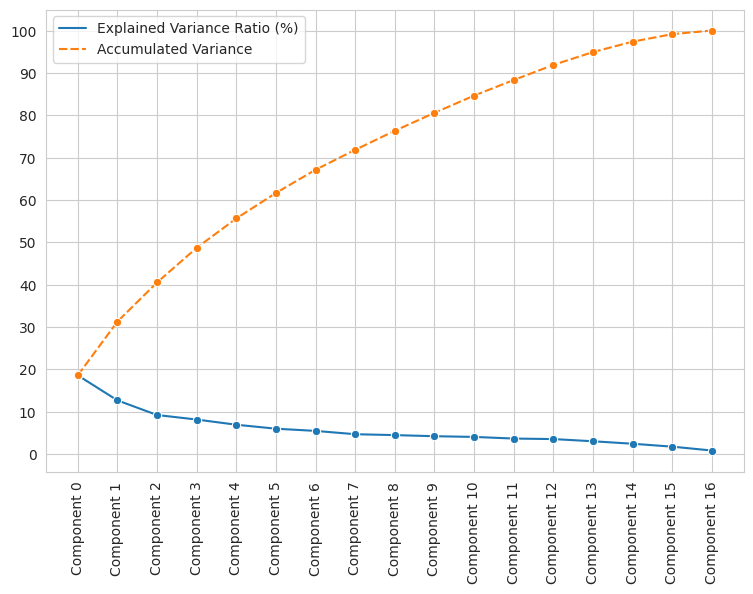

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

n_components = 17


def pca_components_analysis(df_pca, n_components):
    pca = PCA(n_components=n_components).fit(df_pca)
    x_PCA = pca.transform(df_pca)  # array with transformed PCA

    ComponentsList = ["Component " + str(number)
                      for number in range(n_components)]
    dfExplVarRatio = pd.DataFrame(
        data=np.round(100 * pca.explained_variance_ratio_, 3),
        index=ComponentsList,
        columns=['Explained Variance Ratio (%)'])

    dfExplVarRatio['Accumulated Variance'] = dfExplVarRatio['Explained Variance Ratio (%)'].cumsum(
    )

    PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum(
    )

    print(
        f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
    plt.figure(figsize=(9, 6))
    sns.lineplot(data=dfExplVarRatio,  marker="o")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 110, 10))
    plt.show()


pca_components_analysis(df_pca=df_pca, n_components=n_components)

* The 10 components explain 80.58% of the data 



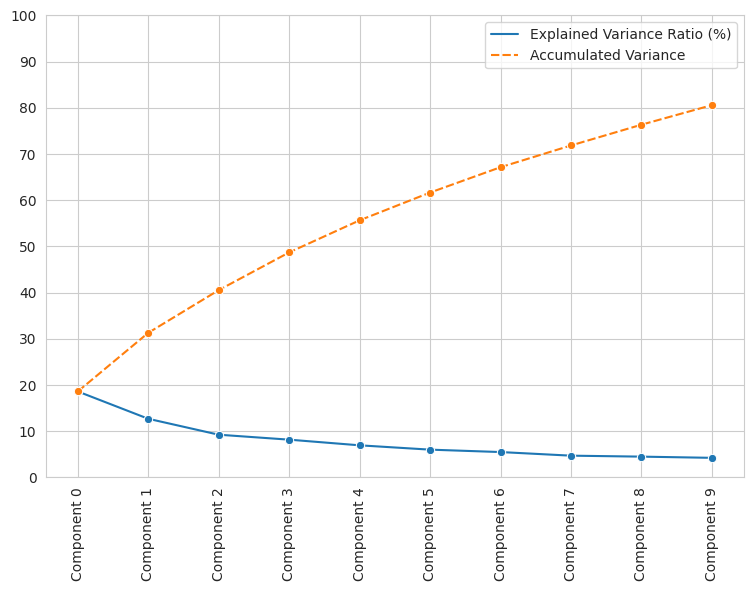

In [9]:
pca_components_analysis(df_pca=df_pca,n_components=10)

In [10]:
def PipelineCluster():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.6, selection_method="variance")),

        ("scaler", StandardScaler()),

        # components updated to 10
        ("PCA", PCA(n_components=10, random_state=0)),

        ("model", KMeans(n_clusters=50, random_state=0)),


    ])
    return pipeline_base


PipelineCluster()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=10, random_state=0)),
                ('model', KMeans(n_clusters=50, random_state=0))])

## Elbow method and silhouette Score

In [11]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df_houseprices_cluster)

print(df_analysis.shape,'\n', type(df_analysis))

/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


(1460, 10) 
 <class 'numpy.ndarray'>


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


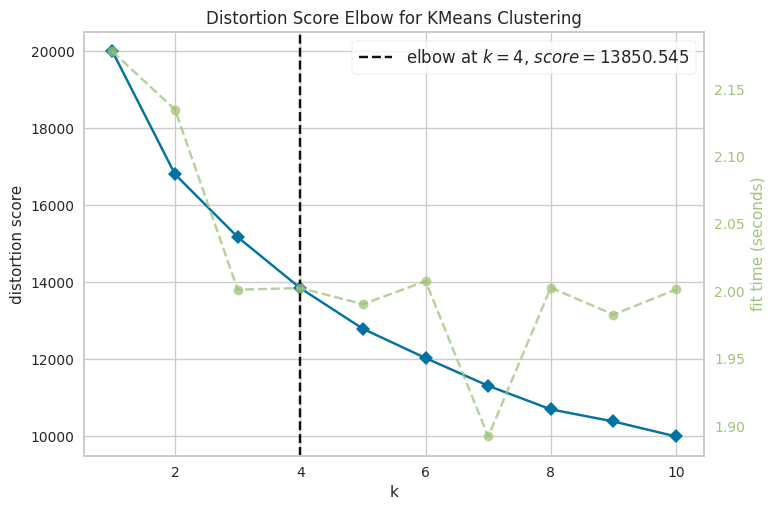

In [12]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11)) # 11 is not inclusive, it will plot until 10
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()

=== Average Silhouette Score for different number of clusters ===


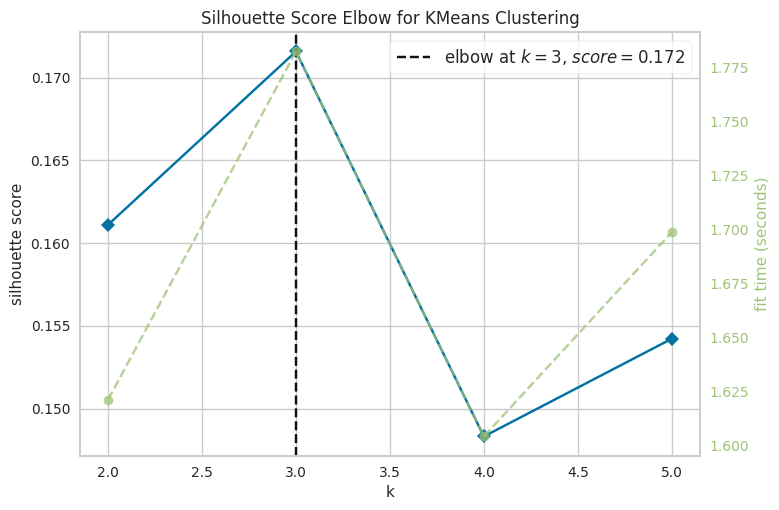



=== Silhouette plot for 2 Clusters ===


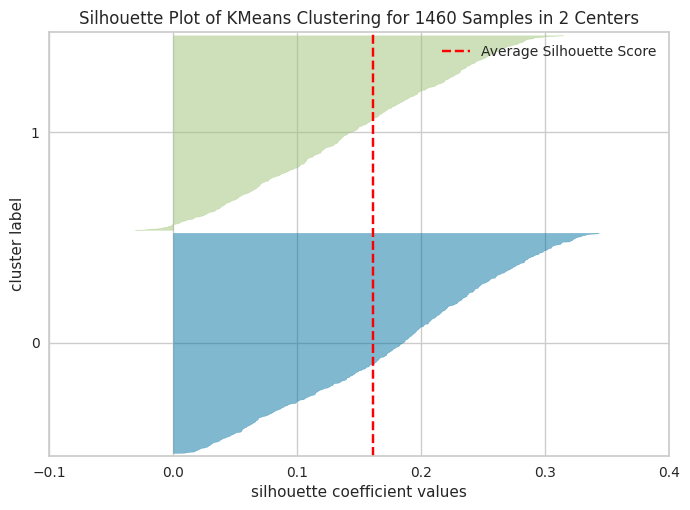



=== Silhouette plot for 3 Clusters ===


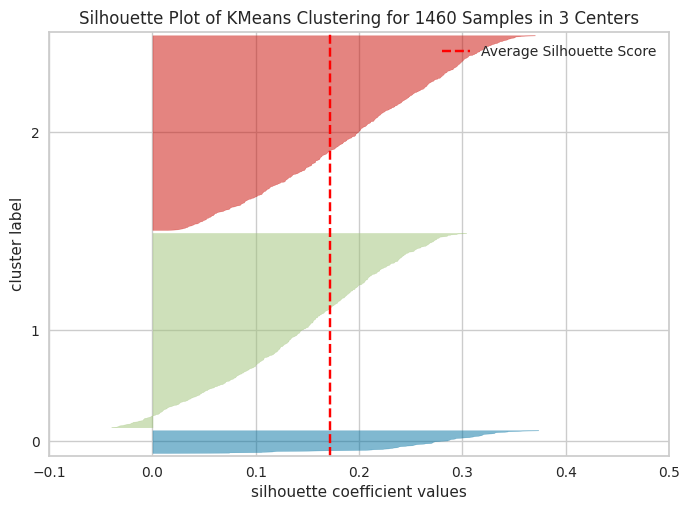



=== Silhouette plot for 4 Clusters ===


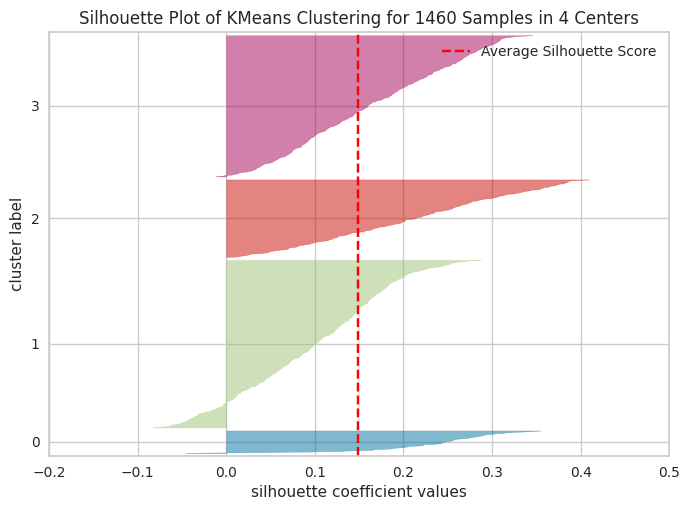



=== Silhouette plot for 5 Clusters ===


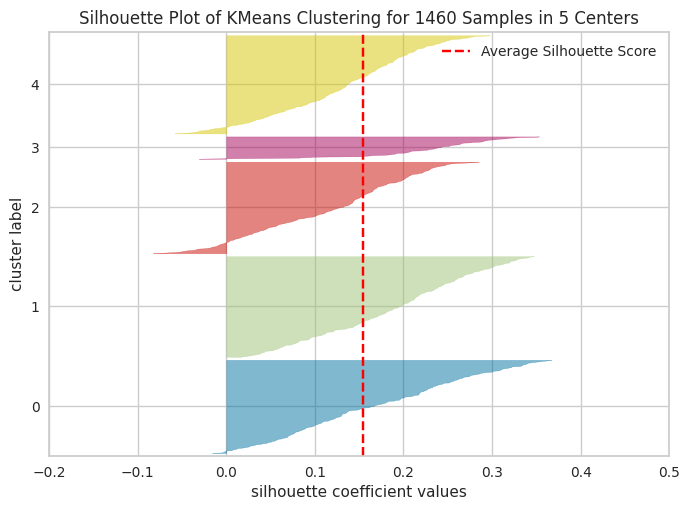

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

# 6 is not inclusive, it will stop at 5
n_cluster_start, n_cluster_stop = 2, 6

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(
    n_cluster_start, n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start, stop=n_cluster_stop):

    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    visualizer = SilhouetteVisualizer(estimator=KMeans(n_clusters=n_clusters, random_state=0),
                                      colors='yellowbrick')
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.show()
    print("\n")

In [14]:
def PipelineCluster():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.6, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=6, random_state=0)),

        # we update n_clusters to 3
        ("model", KMeans(n_clusters=3, random_state=0)),


    ])
    return pipeline_base


PipelineCluster()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=6, random_state=0)),
                ('model', KMeans(n_clusters=3, random_state=0))])

In [15]:
X = df_houseprices_cluster.copy()
print(X.shape)
X.head(3)

(1460, 20)


,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade
0,856,3,No,GLQ,RFn,2003,1710,Gd,8450,65,5,7,856,2003,1,1,1,1,1,0
1,1262,3,Gd,ALQ,RFn,1976,1262,TA,9600,80,8,6,1262,1976,0,0,0,1,1,0
2,920,3,Mn,GLQ,RFn,2001,1786,Gd,11250,68,5,7,920,2001,1,1,1,1,1,1


In [16]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['1stFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinType1',
                                                     'GarageFinish',
                                                     'GarageYrBlt', 'GrLivArea',
                                                     'KitchenQual', 'LotArea',
                                                     'LotFr

## Adding cluster predictions to dataset

In [17]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(1460, 21)


,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,...,OverallQual,TotalBsmtSF,YearBuilt,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade,Clusters
0,856,3,No,GLQ,RFn,2003,1710,Gd,8450,65,...,7,856,2003,1,1,1,1,1,0,1
1,1262,3,Gd,ALQ,RFn,1976,1262,TA,9600,80,...,6,1262,1976,0,0,0,1,1,0,0
2,920,3,Mn,GLQ,RFn,2001,1786,Gd,11250,68,...,7,920,2001,1,1,1,1,1,1,1


* Clusters frequencies 
   Clusters
1      0.48
0      0.46
2      0.06 




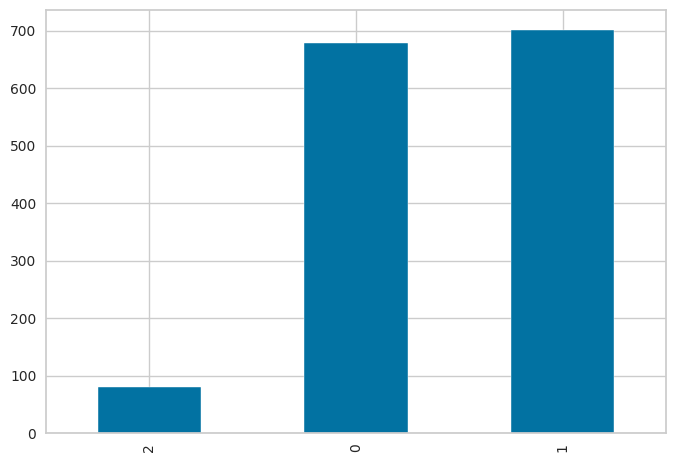

In [18]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.show()

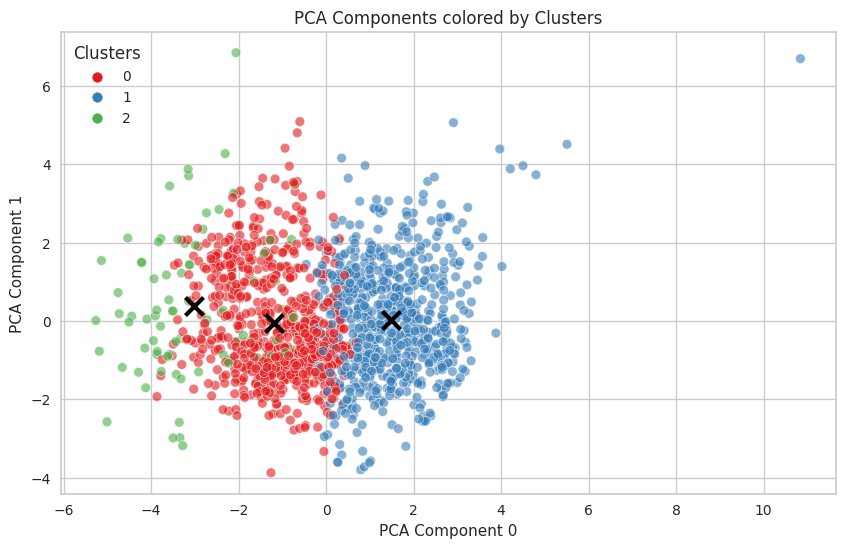

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_analysis[:, 0], y=df_analysis[:, 1],
                hue=X['Clusters'], palette='Set1', alpha=0.6)
plt.scatter(x=pipeline_cluster['model'].cluster_centers_[:, 0], y=pipeline_cluster['model'].cluster_centers_[:, 1],
            marker="x", s=169, linewidths=3, color="black")
plt.xlabel("PCA Component 0")
plt.ylabel("PCA Component 1")
plt.title("PCA Components colored by Clusters")
plt.show()

In [20]:
# Saving cluster predictions with all variables
cluster_predictions_with_all_variables = X['Clusters']
cluster_predictions_with_all_variables

0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    0
1458    0
1459    0
Name: Clusters, Length: 1460, dtype: int32

---

## Fit a classifier, where the target is cluster predictions and features remaining variables

In [21]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

(1460, 21)


,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,...,OverallQual,TotalBsmtSF,YearBuilt,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade,Clusters
0,856,3,No,GLQ,RFn,2003,1710,Gd,8450,65,...,7,856,2003,1,1,1,1,1,0,1
1,1262,3,Gd,ALQ,RFn,1976,1262,TA,9600,80,...,6,1262,1976,0,0,0,1,1,0,0
2,920,3,Mn,GLQ,RFn,2001,1786,Gd,11250,68,...,7,920,2001,1,1,1,1,1,1,1


Split Train and Test sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['Clusters'], axis=1),
    df_clf['Clusters'],
    test_size=0.2,
    random_state=0
)

print(X_train.shape, X_test.shape)

(1168, 20) (292, 20)


Creating classifier pipeline steps

In [23]:
from sklearn.feature_selection import SelectFromModel

# ML algorithm
from sklearn.ensemble import GradientBoostingClassifier


def PipelineClf2ExplainClusters():
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.6, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("feat_selection", SelectFromModel(
            GradientBoostingClassifier(random_state=0))),

        ("model", GradientBoostingClassifier(random_state=0)),

    ])
    return pipeline_base


PipelineClf2ExplainClusters()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))),
                ('model', GradientBoostingClassifier(random_state=0))])

Fit the classifier to the training data

In [24]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train, y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]


Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['1stFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinType1',
                                                     'GarageFi...
                                                     'GarageYrBlt', 'GrLivArea',
                                                     'KitchenQual', 'LotArea',
                                                     'LotFront

## Evaluate classifier performance on Train and Test Sets

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       558
           1       0.96      0.96      0.96       552
           2       1.00      1.00      1.00        58

    accuracy                           0.96      1168
   macro avg       0.97      0.97      0.97      1168
weighted avg       0.96      0.96      0.96      1168



In [26]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       120
           1       0.88      0.87      0.87       149
           2       1.00      1.00      1.00        23

    accuracy                           0.87       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.87      0.87      0.87       292



## Assessing the most important Features that define a cluster

* These are the 4 most important features in descending order. The model was trained on them: 
['YearBuilt', 'HasGarage', 'TotalBsmtSF', 'HasMasVnr'] 



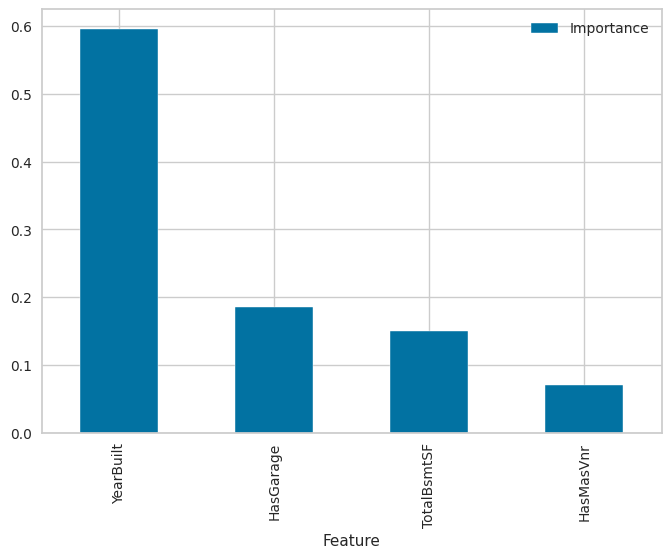

In [27]:
# after data cleaning and feature engineering, the feature space changes

# how many data cleaning and feature engineering steps does your pipeline have?
data_cleaning_feat_eng_steps = 2
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_clf_cluster.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)

best_features = columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support(
)].to_list()

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()],
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

# reassign best features in importance order
best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features} \n")
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

In [28]:
# Creating best_features for later use
best_features_pipeline_all_variables = best_features
best_features_pipeline_all_variables

['YearBuilt', 'HasGarage', 'TotalBsmtSF', 'HasMasVnr']

## Cluster Analysis

Load function that plots a table with description for all Clusters

In [29]:
def DescriptionAllClusters(df, decimal_points=3):

    DescriptionAllClusters = pd.DataFrame(
        columns=df.drop(['Clusters'], axis=1).columns)
    # iterate on each cluster , calls Clusters_IndividualDescription()
    for cluster in df.sort_values(by='Clusters')['Clusters'].unique():

        EDA_ClusterSubset = df.query(
            f"Clusters == {cluster}").drop(['Clusters'], axis=1)
        ClusterDescription = Clusters_IndividualDescription(
            EDA_ClusterSubset, cluster, decimal_points)
        DescriptionAllClusters = DescriptionAllClusters.append(
            ClusterDescription)

    DescriptionAllClusters.set_index(['Cluster'], inplace=True)
    return DescriptionAllClusters


def Clusters_IndividualDescription(EDA_Cluster, cluster, decimal_points):

    ClustersDescription = pd.DataFrame(columns=EDA_Cluster.columns)
    # for a given cluster, iterate over all columns
    # if the variable is numerical, calculate the IQR: display as Q1 -- Q3.
    # That will show the range for the most common values for the numerical variable
    # if the variable is categorical, count the frequencies and displays the top 3 most frequent
    # That will show the most common levels for the category

    for col in EDA_Cluster.columns:

        try:  # eventually a given cluster will have only missing data for a given variable

            if EDA_Cluster[col].dtypes == 'object':

                top_frequencies = EDA_Cluster.dropna(
                    subset=[col])[[col]].value_counts(normalize=True).nlargest(n=3)
                Description = ''

                for x in range(len(top_frequencies)):
                    freq = top_frequencies.iloc[x]
                    category = top_frequencies.index[x][0]
                    CategoryPercentage = int(round(freq*100, 0))
                    statement = f"'{category}': {CategoryPercentage}% , "
                    Description = Description + statement

                ClustersDescription.at[0, col] = Description[:-2]

            elif EDA_Cluster[col].dtypes in ['float', 'int']:
                DescStats = EDA_Cluster.dropna(subset=[col])[[col]].describe()
                Q1 = round(DescStats.iloc[4, 0], decimal_points)
                Q3 = round(DescStats.iloc[6, 0], decimal_points)
                Description = f"{Q1} -- {Q3}"
                ClustersDescription.at[0, col] = Description

        except Exception as e:
            ClustersDescription.at[0, col] = 'Not available'
            print(
                f"** Error Exception: {e} - cluster {cluster}, variable {col}")

    ClustersDescription['Cluster'] = str(cluster)

    return ClustersDescription

Load a custom function to plot cluster distribution per Variable (absolute and relative levels)

In [30]:
import plotly.express as px


def cluster_distribution_per_variable(df, target):
    """
    The data should have 2 variables, the cluster predictions and
    the variable you want to analyze with, in this case we call "target".
    We use plotly express to create 2 plots:
    Cluster distribution across the target.
    Relative presence of the target level in each cluster.
    """
    df_bar_plot = df.value_counts(["Clusters", target]).reset_index()
    df_bar_plot.columns = ['Clusters', target, 'Count']
    df_bar_plot[target] = df_bar_plot[target].astype('object')

    print(f"Clusters distribution across {target} levels")
    fig = px.bar(df_bar_plot, x='Clusters', y='Count',
                 color=target, width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode='array',
                      tickvals=df['Clusters'].unique()))
    fig.show(renderer='jupyterlab')

    df_relative = (df
                   .groupby(["Clusters", target])
                   .size()
                   .groupby(level=0)
                   .apply(lambda x:  100*x / x.sum())
                   .reset_index()
                   .sort_values(by=['Clusters'])
                   )
    df_relative.columns = ['Clusters', target, 'Relative Percentage (%)']

    print(f"Relative Percentage (%) of {target} in each cluster")
    fig = px.line(df_relative, x='Clusters', y='Relative Percentage (%)',
                  color=target, width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode='array',
                      tickvals=df['Clusters'].unique()))
    fig.update_traces(mode='markers+lines')
    fig.show(renderer='jupyterlab')

Create a DataFrame that contains best features and Clusters Predictions to analyse the patterns for each cluster

In [31]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)
print(df_cluster_profile.shape)
df_cluster_profile.head(3)

(1460, 5)


,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr,Clusters
0,2003,1,856,1,1
1,1976,1,1262,0,0
2,2001,1,920,1,1


#### Recode SalePrice into bands for cluster analysis (as in Notebook 4)

In [32]:
df_saleprice = pd.read_csv("outputs/datasets/collection/HousePricesClean.csv").filter(['SalePrice'])
df_saleprice['SalePrice'] = df_saleprice['SalePrice'].astype('object')
df_saleprice.head(3)

,SalePrice
0,208500
1,181500
2,223500


In [33]:
# Defining min and max values
min_price = df_saleprice['SalePrice'].min()
max_price = df_saleprice['SalePrice'].max()

# Calculating band widths
bin_width = (max_price - min_price) / 4

# Defining bin edges
bins = [min_price + i * bin_width for i in range(5)]

# Using pd.cut to create bands and label them with numeric values
df_saleprice['SalePriceBand'] = pd.cut(df_saleprice['SalePrice'], bins=bins, labels=range(4), include_lowest=True)


print(df_saleprice[['SalePrice', 'SalePriceBand']].head())

  SalePrice SalePriceBand
0    208500             0
1    181500             0
2    223500             1
3    140000             0
4    250000             1


In [34]:
# Recode SalePriceBand to integer
df_saleprice['SalePriceBand'] = df_saleprice['SalePriceBand'].astype('int')

In [35]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df=pd.concat([df_cluster_profile,df_saleprice], axis=1), decimal_points=0)
clusters_profile

/tmp/ipykernel_1383/3637392981.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DescriptionAllClusters = DescriptionAllClusters.append(
/tmp/ipykernel_1383/3637392981.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DescriptionAllClusters = DescriptionAllClusters.append(
/tmp/ipykernel_1383/3637392981.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DescriptionAllClusters = DescriptionAllClusters.append(


,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr,SalePrice,SalePriceBand
Cluster,,,,,,
0,1935.0 -- 1969.0,1.0 -- 1.0,728.0 -- 1052.0,0.0 -- 0.0,"'140000': 2% , '135000': 2% , '110000': 2%",0.0 -- 0.0
1,1988.0 -- 2005.0,1.0 -- 1.0,924.0 -- 1536.0,0.0 -- 1.0,"'190000': 1% , '215000': 1% , '176000': 1%",0.0 -- 1.0
2,1920.0 -- 1970.0,0.0 -- 0.0,630.0 -- 945.0,0.0 -- 0.0,"'84500': 4% , '85000': 2% , '141000': 2%",0.0 -- 0.0


In [36]:
df_cluster_vs_saleprice=  df_saleprice.copy()
df_cluster_vs_saleprice['Clusters'] = X['Clusters']
cluster_distribution_per_variable(df=df_cluster_vs_saleprice, target='SalePriceBand')

Clusters distribution across SalePriceBand levels


Relative Percentage (%) of SalePriceBand in each cluster


# Fitting New Cluster Pipeline with most important features

In [37]:
best_features_pipeline_all_variables

['YearBuilt', 'HasGarage', 'TotalBsmtSF', 'HasMasVnr']

## Subset data with the most relevant variables

In [38]:
df_reduced = df_houseprices_cluster.filter(best_features_pipeline_all_variables)
df_reduced.head(3)

,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr
0,2003,1,856,1
1,1976,1,1262,0
2,2001,1,920,1


In [39]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    1460 non-null   int64
 1   HasGarage    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   HasMasVnr    1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [40]:
# Recode 'HasGarage' and 'HasMasVnr' to categorical
df_reduced['HasGarage'] = df_reduced['HasGarage'].astype('object')

In [41]:
# Recode 'HasGarage' and 'HasMasVnr' to categorical
df_reduced['HasMasVnr'] = df_reduced['HasMasVnr'].astype('object')

## Rewrite Cluster Pipeline

In [42]:
def PipelineCluster():
    pipeline_base = Pipeline([

        # we update the pipeline, considering only the most important variables from the previous pipeline
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['HasGarage', 'HasMasVnr'])),

        # it doesn't need SmartCorrelation

        ("scaler", StandardScaler()),

        # No PCA step needed, since we know which features to consider

        ("model", KMeans(n_clusters=3, random_state=0)),


    ])
    return pipeline_base


PipelineCluster()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['HasGarage', 'HasMasVnr'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=3, random_state=0))])

## Apply Elbow Method and Silhouette analysis

In [43]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df_reduced)

print(df_analysis.shape,'\n', type(df_analysis))

(1460, 4) 
 <class 'numpy.ndarray'>


Elbow Analysis

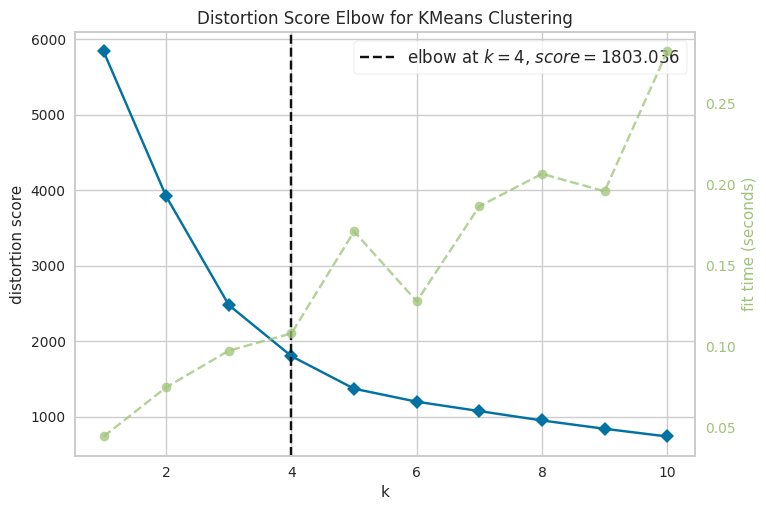

In [44]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11))
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()

=== Average Silhouette Score for different number of clusters ===


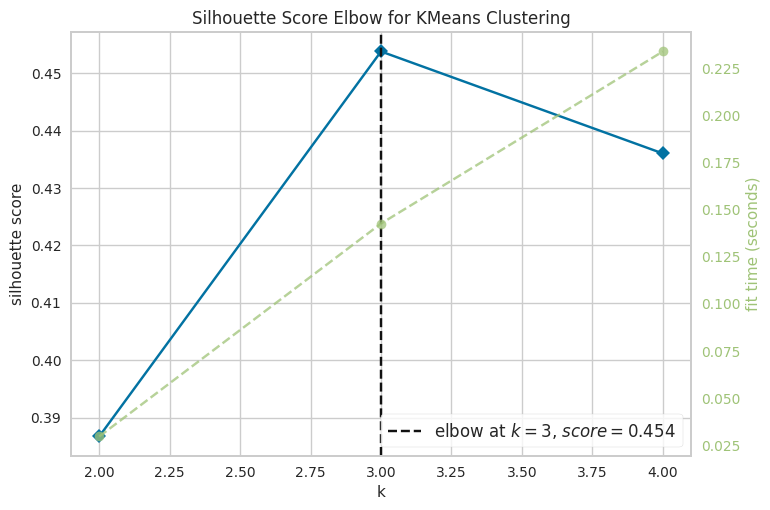



=== Silhouette plot for 2 Clusters ===


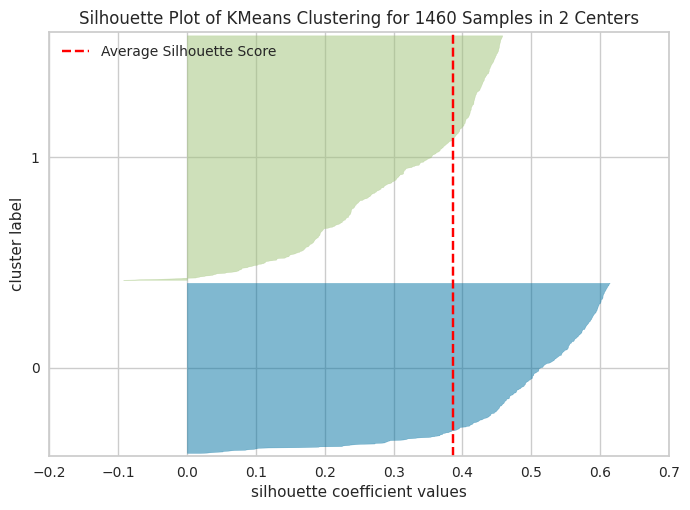



=== Silhouette plot for 3 Clusters ===


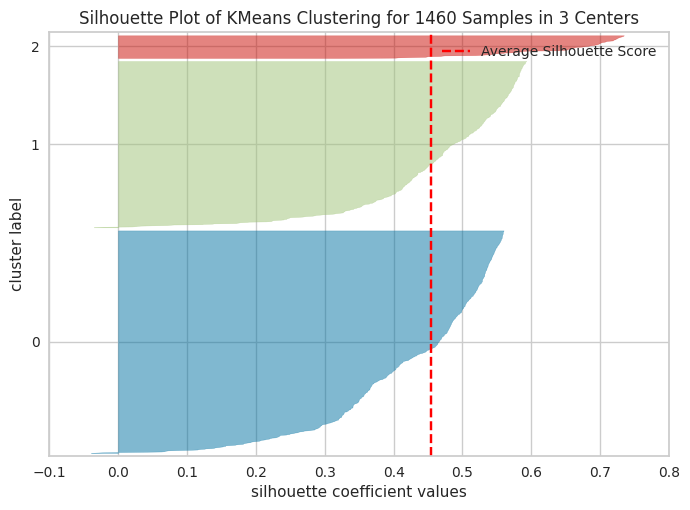



=== Silhouette plot for 4 Clusters ===


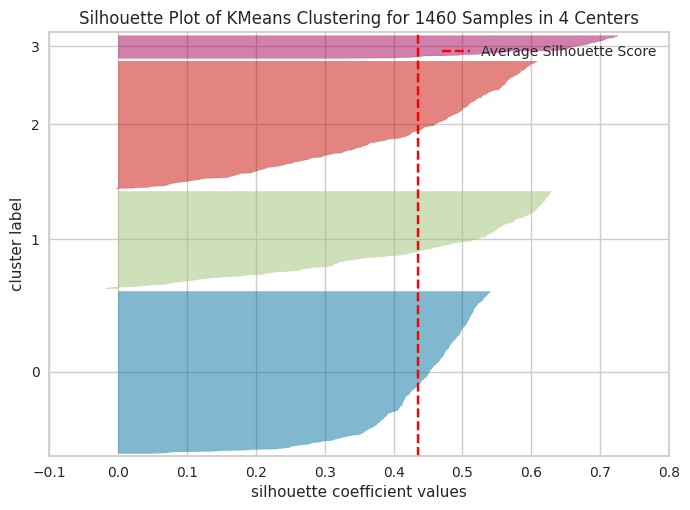

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster_start, n_cluster_stop = 2, 5

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(
    n_cluster_start, n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start, stop=n_cluster_stop):

    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    visualizer = SilhouetteVisualizer(estimator=KMeans(n_clusters=n_clusters, random_state=0),
                                      colors='yellowbrick')
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.show()
    print("\n")

## Fit New Cluster Pipeline

In [46]:
X = df_reduced.copy()
print(X.shape)
X.head(3)

(1460, 4)


,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr
0,2003,1,856,1
1,1976,1,1262,0
2,2001,1,920,1


In [47]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['HasGarage', 'HasMasVnr'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=3, random_state=0))])

## Add cluster predictions to dataset

In [48]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(1460, 5)


,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr,Clusters
0,2003,1,856,1,1
1,1976,1,1262,0,0
2,2001,1,920,1,1


* Clusters frequencies 
   Clusters
0      0.54
1      0.40
2      0.06 




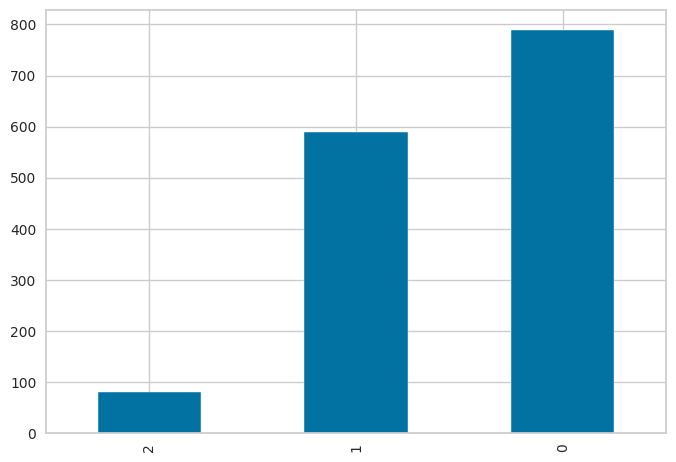

In [49]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.show()

## Compare current cluster predictions to previous cluster predictions

Predictions from cluster pipeline trained with all variables 

In [50]:
cluster_predictions_with_all_variables

0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    0
1458    0
1459    0
Name: Clusters, Length: 1460, dtype: int32

Predictions from cluster pipeline trained with `['YearBuilt', 'HasGarage', 'TotalBsmtSF', 'HasMasVnr']`

In [51]:
cluster_predictions_with_best_features = X['Clusters'] 
cluster_predictions_with_best_features

0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    0
1458    0
1459    0
Name: Clusters, Length: 1460, dtype: int32

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(cluster_predictions_with_all_variables, cluster_predictions_with_best_features))

[[550 128   0]
 [239 462   0]
 [  0   0  81]]


## Fitting a classifier, where the target is cluster predictions and features remaining variables

In [53]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

(1460, 5)


,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr,Clusters
0,2003,1,856,1,1
1,1976,1,1262,0,0
2,2001,1,920,1,1


Split Train and Test Sets

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['Clusters'], axis=1),
    df_clf['Clusters'],
    test_size=0.2,
    random_state=0
)

print(X_train.shape, X_test.shape)

(1168, 4) (292, 4)


In [55]:
def PipelineClf2ExplainClusters():
    pipeline_base = Pipeline([

        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['HasGarage', 'HasMasVnr'])),

        # it doesn't need SmartCorrelation

        ("scaler", StandardScaler()),

        # we don't consider feature selection step, since we know which features to consider

        ("model", GradientBoostingClassifier(random_state=0)),

    ])
    return pipeline_base


PipelineClf2ExplainClusters()

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['HasGarage', 'HasMasVnr'])),
                ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=0))])

## Fit a classifier, where the target is cluster labels and features remaining variables

In [56]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train,y_train)

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['HasGarage', 'HasMasVnr'])),
                ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=0))])

## Evaluate classifier performance on Train and Test Sets

In [57]:
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      1.00      1.00       464
           2       1.00      1.00      1.00        58

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



In [58]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.99      1.00       126
           2       1.00      1.00      1.00        23

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



## Assess Most Important Features

* These are the 4 most important features in descending order. The model was trained on them: 
['HasMasVnr', 'HasGarage', 'TotalBsmtSF', 'YearBuilt']


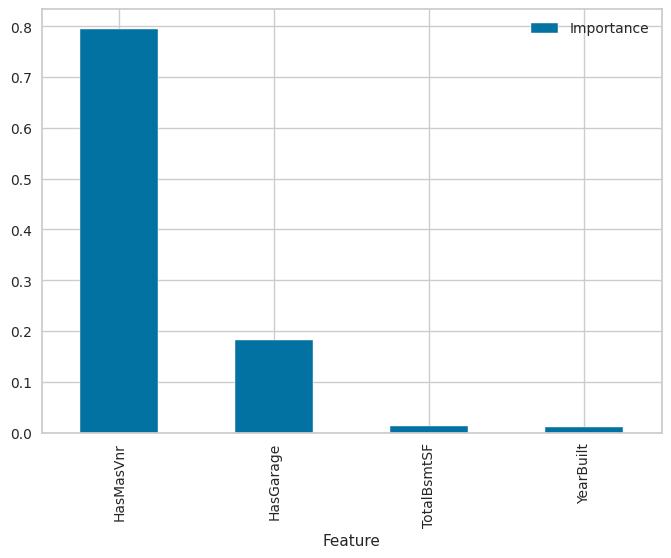

In [59]:
# since we don't have feature selection step in this pipeline, best_features is Xtrain columns
best_features = X_train.columns.to_list()

# create a DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': best_features,
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

## Cluster Analysis

In [60]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)
df_cluster_profile.head(3)

,HasMasVnr,HasGarage,TotalBsmtSF,YearBuilt,Clusters
0,1,1,856,2003,1
1,0,1,1262,1976,0
2,1,1,920,2001,1


In [61]:
df_saleprice = pd.read_csv("outputs/datasets/collection/HousePricesClean.csv").filter(['SalePrice'])
df_saleprice['SalePrice'] = df_saleprice['SalePrice'].astype('object')
df_saleprice.head(3)

,SalePrice
0,208500
1,181500
2,223500


In [62]:
# Defining min and max values
min_price = df_saleprice['SalePrice'].min()
max_price = df_saleprice['SalePrice'].max()

# Calculating band widths
bin_width = (max_price - min_price) / 4

# Defining bin edges
bins = [min_price + i * bin_width for i in range(5)]

# Using pd.cut to create bands and label them with numeric values
df_saleprice['SalePriceBand'] = pd.cut(df_saleprice['SalePrice'], bins=bins, labels=range(4), include_lowest=True)


print(df_saleprice[['SalePrice', 'SalePriceBand']].head())

  SalePrice SalePriceBand
0    208500             0
1    181500             0
2    223500             1
3    140000             0
4    250000             1


In [65]:
# Recode SalePriceBand to integer
df_saleprice['SalePriceBand'] = df_saleprice['SalePriceBand'].astype('int')
df_saleprice. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   object
 1   SalePriceBand  1460 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


### Cluster profile on most important feature

In [68]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df= pd.concat([df_cluster_profile,df_saleprice['SalePriceBand']], axis=1), decimal_points=0)
clusters_profile

/tmp/ipykernel_1383/3637392981.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1383/3637392981.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1383/3637392981.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,HasMasVnr,HasGarage,TotalBsmtSF,YearBuilt,SalePriceBand
Cluster,,,,,
0,"'0': 99% , '1': 1%",'1': 100%,768.0 -- 1108.0,1940.0 -- 1993.0,0.0 -- 0.0
1,"'1': 98% , '0': 2%",'1': 100%,928.0 -- 1534.0,1969.0 -- 2004.0,0.0 -- 1.0
2,"'0': 93% , '1': 7%",'0': 100%,630.0 -- 945.0,1920.0 -- 1970.0,0.0 -- 0.0


In [70]:
df_cluster_vs_saleprice=  df_saleprice.copy()
df_cluster_vs_saleprice['Clusters'] = X['Clusters']
cluster_distribution_per_variable(df=df_cluster_vs_saleprice, target='SalePriceBand')

Clusters distribution across SalePriceBand levels


Relative Percentage (%) of SalePriceBand in each cluster


In [71]:
pipeline_cluster

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['HasGarage', 'HasMasVnr'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=3, random_state=0))])

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [72]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/cluster_analysis/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

In [73]:
pipeline_cluster

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['HasGarage', 'HasMasVnr'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=3, random_state=0))])

In [74]:
joblib.dump(value=pipeline_cluster, filename=f"{file_path}/cluster_pipeline.pkl")

['outputs/ml_pipeline/cluster_analysis/v1/cluster_pipeline.pkl']

In [75]:
print(df_reduced.shape)
df_reduced.head(3)

(1460, 4)


,YearBuilt,HasGarage,TotalBsmtSF,HasMasVnr
0,2003,1,856,1
1,1976,1,1262,0
2,2001,1,920,1


In [76]:
df_reduced.to_csv(f"{file_path}/TrainSet.csv", index=False)

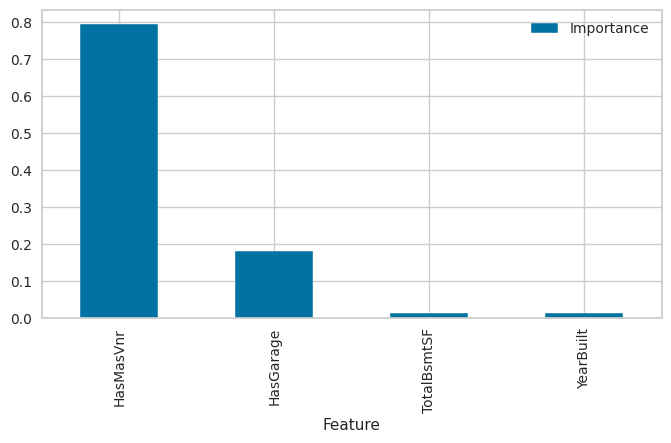

In [77]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance', figsize=(8,4))
plt.show()

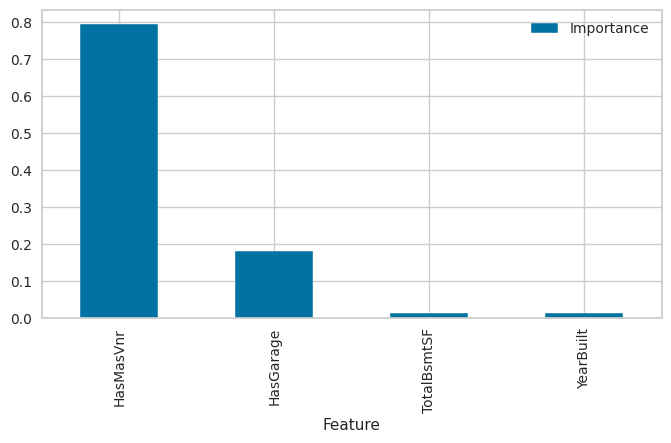

In [78]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance', figsize=(8,4))
plt.savefig(f"{file_path}/features_define_cluster.png", bbox_inches='tight', dpi=150)

In [79]:
clusters_profile

,HasMasVnr,HasGarage,TotalBsmtSF,YearBuilt,SalePriceBand
Cluster,,,,,
0,"'0': 99% , '1': 1%",'1': 100%,768.0 -- 1108.0,1940.0 -- 1993.0,0.0 -- 0.0
1,"'1': 98% , '0': 2%",'1': 100%,928.0 -- 1534.0,1969.0 -- 2004.0,0.0 -- 1.0
2,"'0': 93% , '1': 7%",'0': 100%,630.0 -- 945.0,1920.0 -- 1970.0,0.0 -- 0.0


In [80]:
clusters_profile.to_csv(f"{file_path}/clusters_profile.csv")

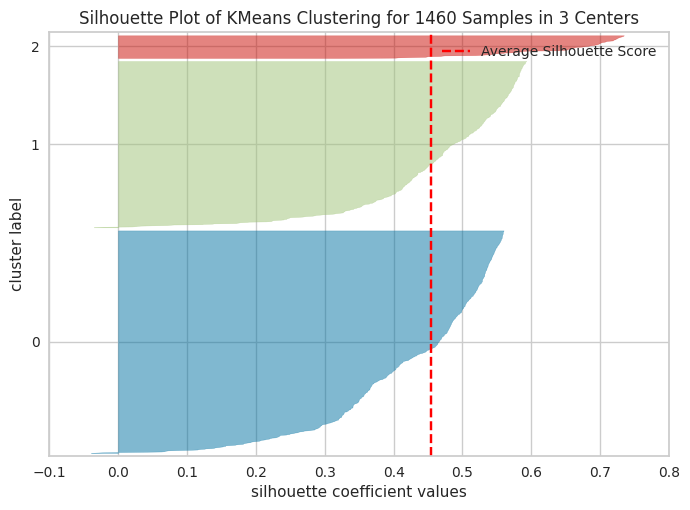

In [81]:
visualizer = SilhouetteVisualizer(Pipeline(pipeline_cluster.steps[-1:])[0] , colors='yellowbrick')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()

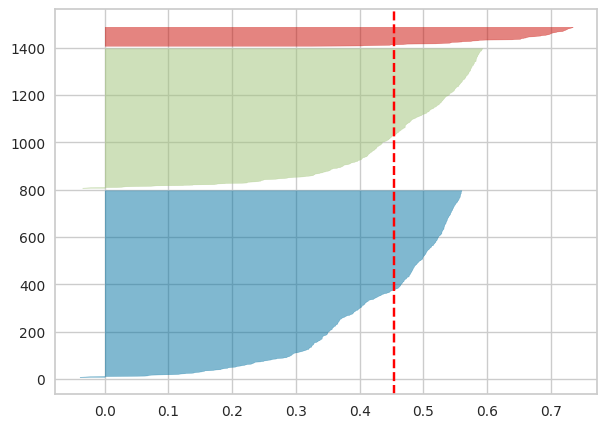

In [82]:
fig, axes = plt.subplots(figsize=(7,5))
fig = SilhouetteVisualizer(Pipeline(pipeline_cluster.steps[-1:])[0] , colors='yellowbrick', ax=axes)
fig.fit(df_analysis)

plt.savefig(f"{file_path}/clusters_silhouette.png", bbox_inches='tight',dpi=150)